# <span style='color: black'> CORONAVIRUS VACCINATION </span>

## Importing libraries

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.datasets import load_digits, load_iris
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [66]:
#pip3 install folium
#pip3 install plotly

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import math
import random
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

In [67]:
vaccine = pd.read_csv('covid_vaccine_statewise.csv', parse_dates=['Date'],dayfirst=True)
vaccine.head()

,Date,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [68]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 4142 non-null   datetime64[ns]
 1   State                                4142 non-null   object        
 2   Total Individuals Vaccinated         4098 non-null   float64       
 3   Total Sessions Conducted             4098 non-null   float64       
 4   Total Sites                          4098 non-null   float64       
 5   First Dose Administered              4098 non-null   float64       
 6   Second Dose Administered             4098 non-null   float64       
 7   Male(Individuals Vaccinated)         4098 non-null   float64       
 8   Female(Individuals Vaccinated)       4098 non-null   float64       
 9   Transgender(Individuals Vaccinated)  4098 non-null   float64       
 10  Total Covaxi

In [69]:
vaccine.dtypes

Date                                   datetime64[ns]
State                                          object
Total Individuals Vaccinated                  float64
Total Sessions Conducted                      float64
Total Sites                                   float64
First Dose Administered                       float64
Second Dose Administered                      float64
Male(Individuals Vaccinated)                  float64
Female(Individuals Vaccinated)                float64
Transgender(Individuals Vaccinated)           float64
Total Covaxin Administered                    float64
Total CoviShield Administered                 float64
AEFI                                          float64
18-30 years (Age)                             float64
30-45 years (Age)                             float64
45-60 years (Age)                             float64
60+ years (Age)                               float64
Total Doses Administered                      float64
dtype: object

In [70]:
vaccine.isnull().sum()                                                          #Null value of data

Date                                      0
State                                     0
Total Individuals Vaccinated             44
Total Sessions Conducted                 44
Total Sites                              44
First Dose Administered                  44
Second Dose Administered                 44
Male(Individuals Vaccinated)             44
Female(Individuals Vaccinated)           44
Transgender(Individuals Vaccinated)      44
Total Covaxin Administered               44
Total CoviShield Administered            44
AEFI                                   2301
18-30 years (Age)                      2301
30-45 years (Age)                      2301
45-60 years (Age)                      2301
60+ years (Age)                        2301
Total Doses Administered                  1
dtype: int64

In [71]:
vaccine

,Date,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,2021-05-03,West Bengal,8725020.0,510205.0,2952.0,8725020.0,2531077.0,4685336.0,4038697.0,987.0,1191584.0,10064513.0,1024.0,271113.0,792723.0,3937143.0,3723296.0,11256097.0
4138,2021-05-04,West Bengal,8750404.0,410075.0,2377.0,8750404.0,2659493.0,4699482.0,4049922.0,1000.0,1204436.0,10205461.0,1027.0,272398.0,795002.0,3948089.0,3734160.0,11409897.0
4139,2021-05-05,West Bengal,8764695.0,289035.0,1626.0,8764695.0,2742032.0,4707646.0,4056047.0,1002.0,1214446.0,10292281.0,1028.0,273873.0,797418.0,3953484.0,3739165.0,11506727.0
4140,2021-05-06,West Bengal,8777268.0,301115.0,1674.0,8777268.0,2817455.0,4715269.0,4060997.0,1002.0,1226791.0,10367932.0,1028.0,275491.0,800454.0,3957788.0,3742778.0,11594723.0


In [72]:
#Shorting names

vaccine = vaccine[['Date', 'State', 'First Dose Administered', 'Second Dose Administered', 'Male(Individuals Vaccinated)', 
                   'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
                   'Total Covaxin Administered', 'Total CoviShield Administered', '18-30 years (Age)', 
                   '30-45 years (Age)', '45-60 years (Age)','60+ years (Age)', 'Total Doses Administered']]

vaccine.columns=['date', 'state', 'first dose', 'second dose', 'male', 'female', 'transgender', 'Covaxin', 'covishield',
                '18-30 years', '30-45 years','45-60 years','60 above','total_doses']

In [73]:
vaccine.head()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
0,2021-01-16,India,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,2021-01-17,India,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,2021-01-18,India,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,2021-01-19,India,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,2021-01-20,India,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0


In [74]:
vaccine.tail()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
4137,2021-05-03,West Bengal,8725020.0,2531077.0,4685336.0,4038697.0,987.0,1191584.0,10064513.0,271113.0,792723.0,3937143.0,3723296.0,11256097.0
4138,2021-05-04,West Bengal,8750404.0,2659493.0,4699482.0,4049922.0,1000.0,1204436.0,10205461.0,272398.0,795002.0,3948089.0,3734160.0,11409897.0
4139,2021-05-05,West Bengal,8764695.0,2742032.0,4707646.0,4056047.0,1002.0,1214446.0,10292281.0,273873.0,797418.0,3953484.0,3739165.0,11506727.0
4140,2021-05-06,West Bengal,8777268.0,2817455.0,4715269.0,4060997.0,1002.0,1226791.0,10367932.0,275491.0,800454.0,3957788.0,3742778.0,11594723.0
4141,2021-05-07,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [75]:
vaccine

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
0,2021-01-16,India,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,2021-01-17,India,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,2021-01-18,India,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,2021-01-19,India,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,2021-01-20,India,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,2021-05-03,West Bengal,8725020.0,2531077.0,4685336.0,4038697.0,987.0,1191584.0,10064513.0,271113.0,792723.0,3937143.0,3723296.0,11256097.0
4138,2021-05-04,West Bengal,8750404.0,2659493.0,4699482.0,4049922.0,1000.0,1204436.0,10205461.0,272398.0,795002.0,3948089.0,3734160.0,11409897.0
4139,2021-05-05,West Bengal,8764695.0,2742032.0,4707646.0,4056047.0,1002.0,1214446.0,10292281.0,273873.0,797418.0,3953484.0,3739165.0,11506727.0
4140,2021-05-06,West Bengal,8777268.0,2817455.0,4715269.0,4060997.0,1002.0,1226791.0,10367932.0,275491.0,800454.0,3957788.0,3742778.0,11594723.0


In [76]:
vaccine["state"].describe()

count        4142
unique         38
top       Manipur
freq          112
Name: state, dtype: object

In [77]:
vaccine.state.value_counts()

Manipur                                     112
Telangana                                   112
Sikkim                                      112
Madhya Pradesh                              112
Chandigarh                                  112
Tripura                                     112
Jharkhand                                   112
Uttar Pradesh                               112
Rajasthan                                   112
Haryana                                     112
Meghalaya                                   112
Ladakh                                      112
Jammu and Kashmir                           112
Gujarat                                     112
Maharashtra                                 112
India                                       112
Nagaland                                    112
Lakshadweep                                 112
Tamil Nadu                                  112
Puducherry                                  112
Karnataka                               

In [78]:
vaccine.state.unique().shape                               # unique value of state

(38,)

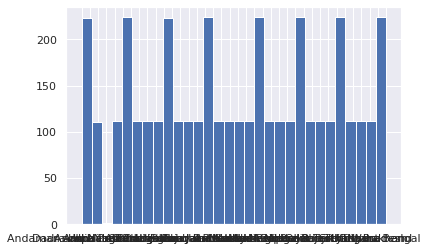

In [79]:
vaccine["state"].hist(bins=30)

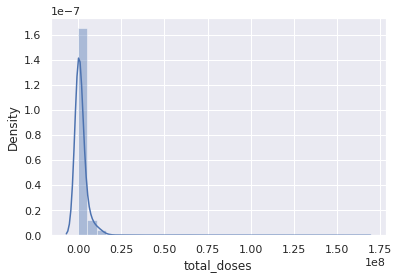

In [80]:
sns.distplot(vaccine.total_doses,bins=30)

In [81]:
today = vaccine[vaccine.date=='2021-05-03']

In [82]:
today.shape

(37, 14)

In [83]:
today.head()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
107,2021-05-03,India,127696675.0,28385461.0,66737774.0,60942039.0,16862.0,14654260.0,141427876.0,4927274.0,10424846.0,58901132.0,53426355.0,156082136.0
219,2021-05-03,Andaman and Nicobar Islands,94633.0,11617.0,51480.0,43145.0,8.0,0.0,106250.0,1592.0,7190.0,56479.0,29371.0,106250.0
330,2021-05-03,Andhra Pradesh,5195851.0,1536916.0,2663314.0,2531894.0,643.0,1155229.0,5577538.0,393031.0,547712.0,2337772.0,1916527.0,6732767.0
442,2021-05-03,Arunachal Pradesh,193841.0,58686.0,108792.0,84972.0,77.0,0.0,252527.0,14468.0,37938.0,100965.0,40444.0,252527.0
554,2021-05-03,Assam,2096948.0,578898.0,1138713.0,957974.0,261.0,514792.0,2161054.0,72632.0,254588.0,1097568.0,672062.0,2675846.0


In [84]:
#sorting data along with vaccination date
total_doses=today.sort_values(by='total_doses', ascending=False)

In [85]:
total_doses.head(10)

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
107,2021-05-03,India,127696675.0,28385461.0,66737774.0,60942039.0,16862.0,14654260.0,141427876.0,4927274.0,10424846.0,58901132.0,53426355.0,156082136.0
2457,2021-05-03,Maharashtra,13739753.0,2686134.0,7396138.0,6341872.0,1743.0,1831851.0,14594036.0,518334.0,1316349.0,6275584.0,5628380.0,16425887.0
3353,2021-05-03,Rajasthan,11008158.0,2342911.0,5581571.0,5425088.0,1499.0,676497.0,12674572.0,295225.0,580179.0,4849642.0,5281828.0,13351069.0
1337,2021-05-03,Gujarat,10243032.0,2723078.0,5445977.0,4795809.0,1246.0,1253962.0,11712148.0,549571.0,960138.0,4685898.0,4045312.0,12966110.0
3913,2021-05-03,Uttar Pradesh,10439785.0,2445210.0,5876658.0,4561356.0,1771.0,1316011.0,11568984.0,417495.0,838576.0,4819934.0,4360964.0,12884995.0
4137,2021-05-03,West Bengal,8725020.0,2531077.0,4685336.0,4038697.0,987.0,1191584.0,10064513.0,271113.0,792723.0,3937143.0,3723296.0,11256097.0
1897,2021-05-03,Karnataka,8253648.0,1647403.0,3956396.0,4296182.0,1070.0,944843.0,8956208.0,353392.0,498035.0,3825697.0,3575095.0,9901051.0
2345,2021-05-03,Madhya Pradesh,7065585.0,1162819.0,3774656.0,3290084.0,845.0,743924.0,7484480.0,188852.0,464267.0,3429887.0,2981817.0,8228404.0
2009,2021-05-03,Kerala,6092349.0,1419105.0,2761697.0,3329892.0,760.0,387629.0,7123825.0,217267.0,403608.0,2343224.0,3127917.0,7511454.0
666,2021-05-03,Bihar,6027693.0,1205478.0,3103314.0,2923627.0,752.0,403840.0,6829331.0,165673.0,414659.0,2455247.0,2991407.0,7233171.0


In [86]:
top_states_vaccinated = total_doses[0:10]

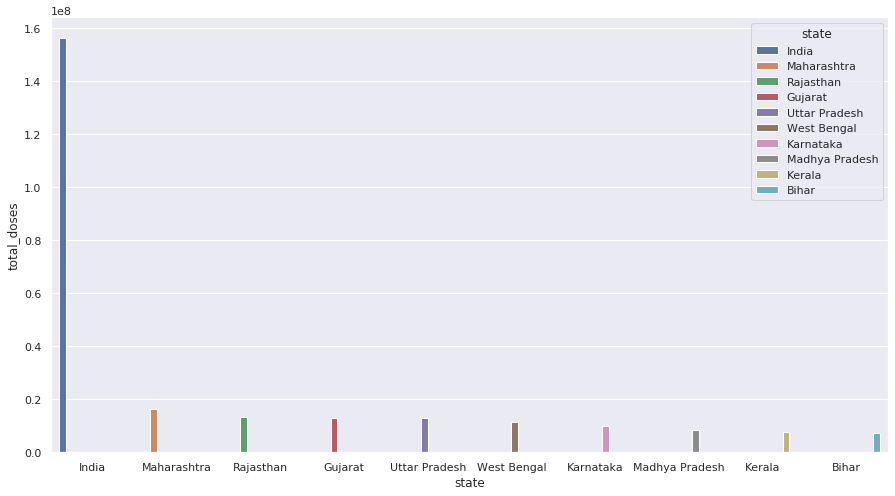

In [87]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="state",y="total_doses",data=top_states_vaccinated,hue="state")
plt.show()

In [90]:
maha = vaccine[vaccine.state=="Maharashtra"]

In [91]:
maha.shape

(112, 14)

In [92]:
maha.head()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
2350,2021-01-16,Maharashtra,5726.0,0.0,3668.0,2057.0,1.0,85.0,5641.0,NaN,NaN,NaN,NaN,5726.0
2351,2021-01-17,Maharashtra,6521.0,0.0,3953.0,2566.0,2.0,94.0,6427.0,NaN,NaN,NaN,NaN,6521.0
2352,2021-01-18,Maharashtra,6151.0,0.0,3569.0,2581.0,1.0,105.0,6046.0,NaN,NaN,NaN,NaN,6151.0
2353,2021-01-19,Maharashtra,13699.0,0.0,6328.0,7367.0,4.0,214.0,13485.0,NaN,NaN,NaN,NaN,13699.0
2354,2021-01-20,Maharashtra,23880.0,0.0,9658.0,14205.0,17.0,439.0,23441.0,NaN,NaN,NaN,NaN,23880.0


In [93]:
maha.tail()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
2457,2021-05-03,Maharashtra,13739753.0,2686134.0,7396138.0,6341872.0,1743.0,1831851.0,14594036.0,518334.0,1316349.0,6275584.0,5628380.0,16425887.0
2458,2021-05-04,Maharashtra,13799328.0,2729017.0,7430828.0,6366715.0,1785.0,1842007.0,14686338.0,536923.0,1339399.0,6286649.0,5635218.0,16528345.0
2459,2021-05-05,Maharashtra,13935541.0,2866714.0,7504642.0,6429098.0,1801.0,1857429.0,14944826.0,559086.0,1370343.0,6337875.0,5667095.0,16802255.0
2460,2021-05-06,Maharashtra,14214775.0,3081334.0,7656559.0,6556365.0,1851.0,1894014.0,15402095.0,593300.0,1421705.0,6451723.0,5746890.0,17296109.0
2461,2021-05-07,Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


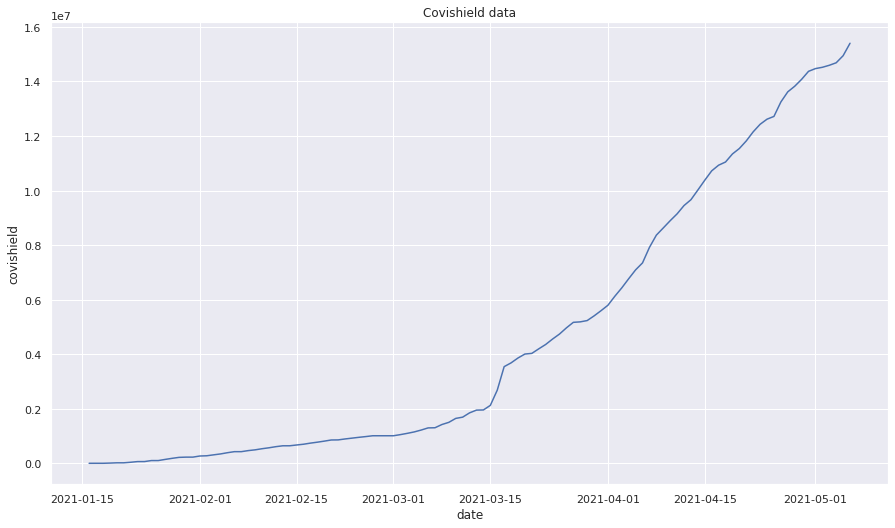

In [107]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="covishield",data=maha,color='b')
plt.title("Covishield data")
plt.show()

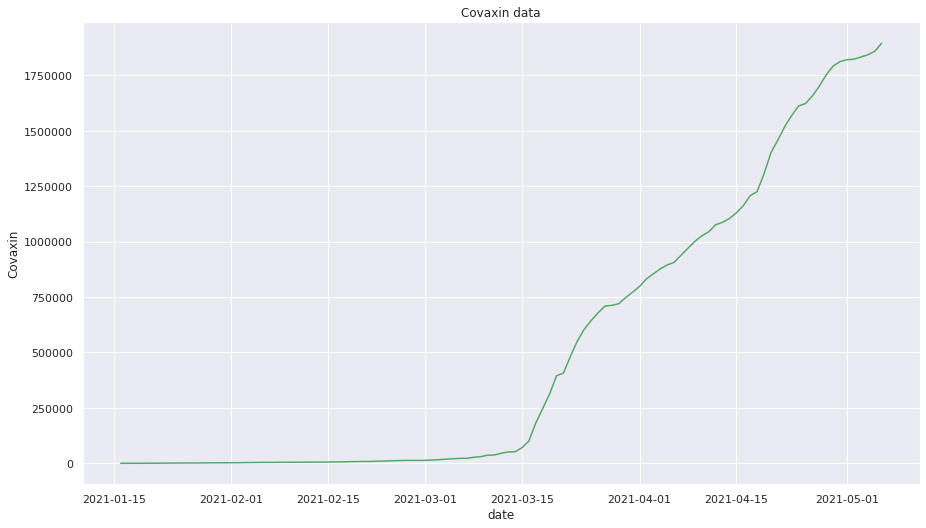

In [108]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="Covaxin",data=maha,color='g')
plt.title("Covaxin data")
plt.show()

In [110]:
raj = vaccine[vaccine.state=="Rajasthan"]

In [111]:
raj.head()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
3246,2021-01-16,Rajasthan,3285.0,0.0,2036.0,1249.0,0.0,117.0,3168.0,NaN,NaN,NaN,NaN,3285.0
3247,2021-01-17,Rajasthan,3455.0,0.0,2163.0,1292.0,0.0,118.0,3337.0,NaN,NaN,NaN,NaN,3455.0
3248,2021-01-18,Rajasthan,4037.0,0.0,2326.0,1710.0,1.0,232.0,3805.0,NaN,NaN,NaN,NaN,4037.0
3249,2021-01-19,Rajasthan,13022.0,0.0,7042.0,5979.0,1.0,681.0,12341.0,NaN,NaN,NaN,NaN,13022.0
3250,2021-01-20,Rajasthan,13146.0,0.0,7102.0,6043.0,1.0,681.0,12465.0,NaN,NaN,NaN,NaN,13146.0


In [112]:
raj.tail()

,date,state,first dose,second dose,male,female,transgender,Covaxin,covishield,18-30 years,30-45 years,45-60 years,60 above,total_doses
3353,2021-05-03,Rajasthan,11008158.0,2342911.0,5581571.0,5425088.0,1499.0,676497.0,12674572.0,295225.0,580179.0,4849642.0,5281828.0,13351069.0
3354,2021-05-04,Rajasthan,11108037.0,2389145.0,5640432.0,5466078.0,1527.0,690074.0,12807108.0,323454.0,610786.0,4878611.0,5293886.0,13497182.0
3355,2021-05-05,Rajasthan,11195379.0,2430943.0,5692350.0,5501488.0,1541.0,703252.0,12923070.0,348739.0,639527.0,4902645.0,5303168.0,13626322.0
3356,2021-05-06,Rajasthan,11266670.0,2470249.0,5734197.0,5530910.0,1563.0,715559.0,13021360.0,368212.0,661307.0,4924146.0,5311699.0,13736919.0
3357,2021-05-07,Rajasthan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


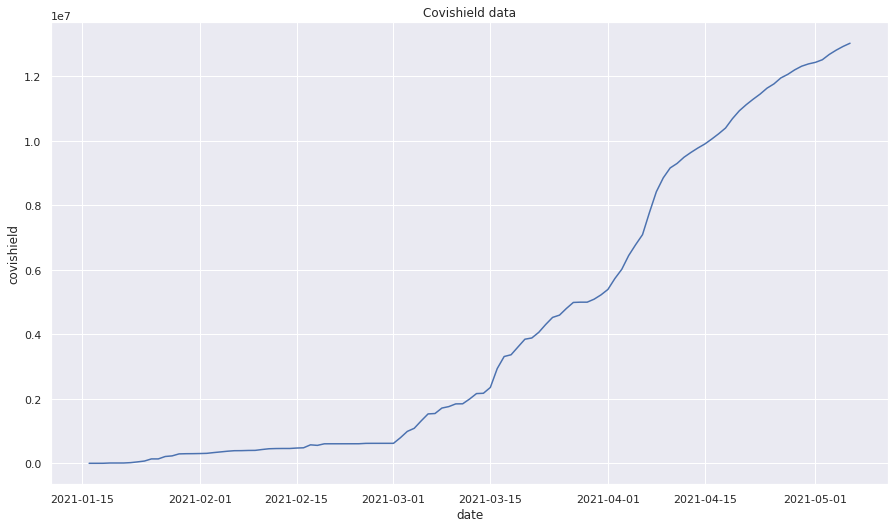

In [113]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="covishield",data=raj,color='b')
plt.title("Covishield data")
plt.show()

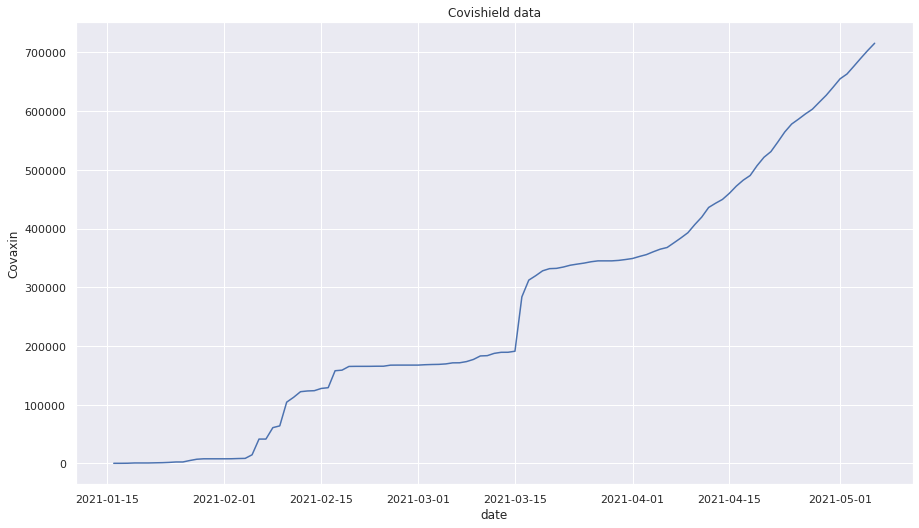

In [114]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="Covaxin",data=raj,color='b')
plt.title("Covishield data")
plt.show()